## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Chapter 1: Business Overview


### 1.1   Introduction


The real estate market demands accurate pricing for homes. Inaccurate pricing can lead to prolonged property listings and missed profit opportunities.

Our solution: We're exploring a multilinear regression model to revolutionize the way houses are priced by using data analysis and predictive modeling.


### 1.2   Challenges


Real estate challenges: Overpricing and a lack of a decision framework.

Overpricing results in unsold properties, extra costs, and lower profits.

Buyers struggle to find properties that fit their budgets and preferences.

### 1.3    Problem Statement


Core problem: Accurate pricing of homes in the market.

Overpricing harms both sellers and buyers.

A data-driven solution is needed to provide precise price predictions, addressing real estate market challenges.


## Objectives

a). Build a multilinear regression model to accurately estimate house prices based on property features such as bedrooms, bathrooms, square footage, and location. This model will help in setting competitive prices for properties.


b). Determine the most influential factors affecting house prices in King County, including property characteristics and geographical location.


c). Assess the effectiveness of the house price prediction model by evaluating metrics such as mean squared error, R-squared values, and residual analysis.


d). Deliver actionable recommendations to the Real Estate Agency to enhance profitability and market competitiveness, leveraging insights from the model's analysis.

### IMPORTING THE NECESSARY LIBRARIES AND LOADING THE DATASET

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions as fn
import missingno as msno
%matplotlib inline


In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### DATA UNDERSTANDING 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,...,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,...,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,...,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,...,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,...,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,...,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,...,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## DATA CLEANING

### HANDLING MISSING VALUES

We'll start with visualizing our data to see if it has any missing values

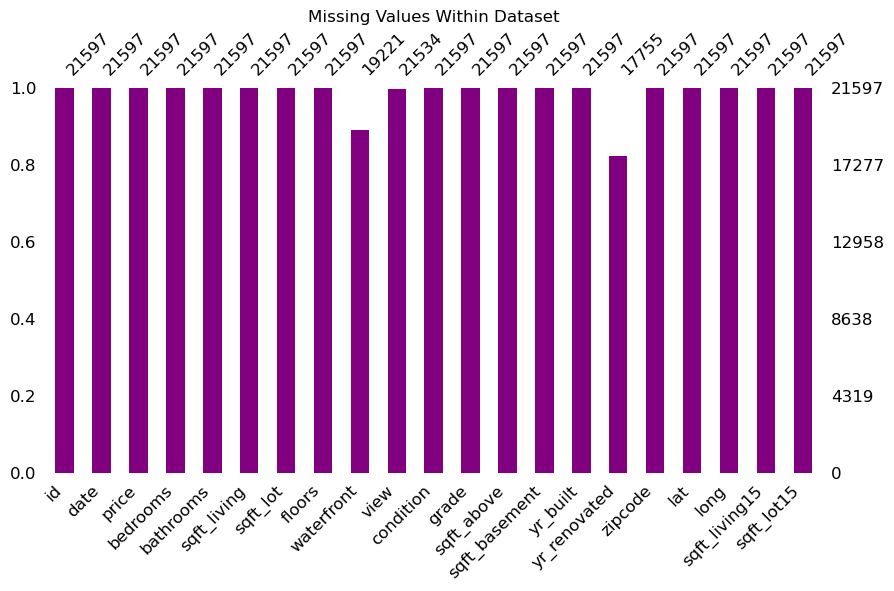

In [6]:
# Visualise the missing values in the dataset
msno.bar(df, color='purple', figsize=(10, 5), fontsize=12)
plt.title('Missing Values Within Dataset')
plt.show()

Lets find out how many each of the column has

In [7]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Missing Values in Waterfront, View, and Yr_renovated Columns**

We've identified missing values in the Waterfront, View (albeit relatively few), and Yr_renovated columns.

**Addressing Missing Values:**
Since both the Waterfront and View columns contain a substantial number of missing values, simply dropping them is not a viable solution. Instead, we propose a more data-driven approach. We'll group the data by zipcodes and replace the missing values with the mode (most common value) for each specific zipcode. This approach is grounded in the reasonable assumption that properties in the same zipcode share similar characteristics, particularly regarding waterfront and views.

This data imputation strategy ensures that our dataset remains comprehensive and is based on a plausible assumption about the correlation between housing features and location.

In [8]:
# Group the DataFrame by 'zipcode' and calculate the mode for 'waterfront' within each group
mode_waterfront_by_zipcode = df.groupby('zipcode')['waterfront'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'waterfront' values based on the 'zipcode' mode
df['waterfront'] = df.apply(lambda row: mode_waterfront_by_zipcode[row['zipcode']] if pd.isna(row['waterfront']) else row['waterfront'], axis=1)


In [9]:
# Group the DataFrame by 'zipcode' and calculate the mode for 'view' within each group
mode_view_by_zipcode = df.groupby('zipcode')['view'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'view' values based on the 'zipcode' mode
df['view'] = df.apply(lambda row: mode_view_by_zipcode[row['zipcode']] if pd.isna(row['view']) else row['view'], axis=1)


Let us handle the missing values in the year renovated column

In [10]:
# Fill missing values in the 'yr_renovated' column with 0
df['yr_renovated'].fillna(0, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Handling duplicates

In [12]:
df.duplicated().any()

False

We do not have any duplicated values

## Handling Outliers

In this section, we will specifically address outlier handling in numerical columns. To streamline the process and maintain focus, we will exclude the following columns: `id`, `lat`, and `long`. These columns have been excluded as they do not significantly impact the model's performance.


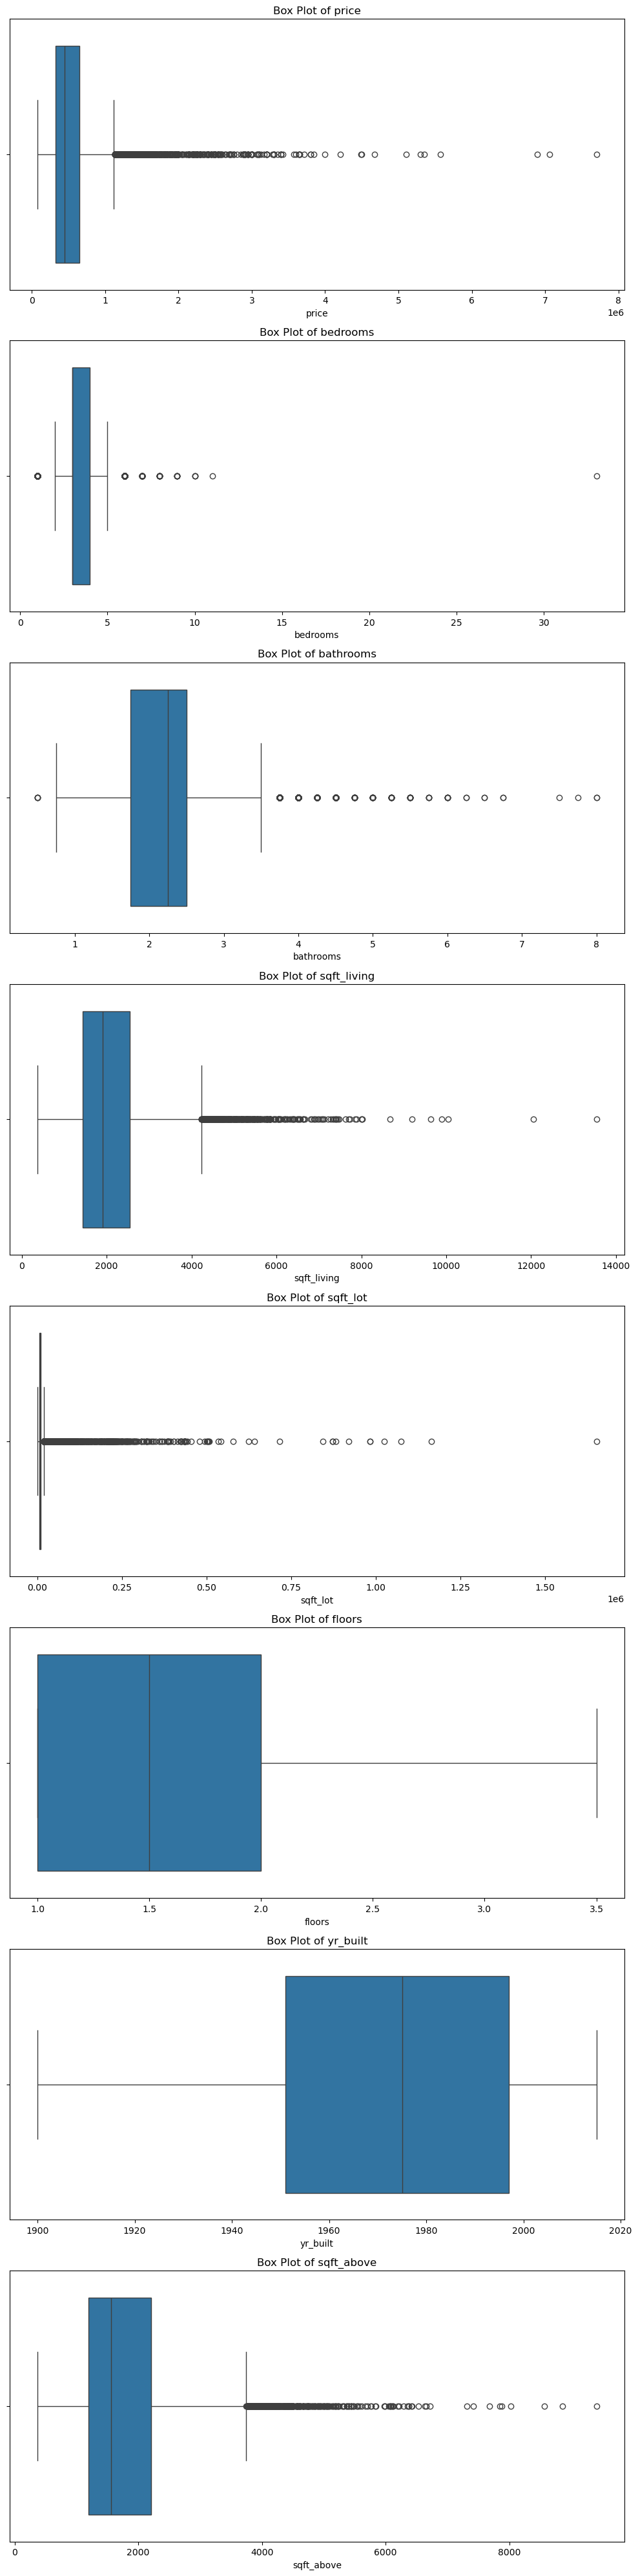

In [13]:
# Specify the columns to create box plots for
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'yr_built', 'sqft_above']

# Create a grid of subplots
num_cols = len(columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through the specified columns and create box plots
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


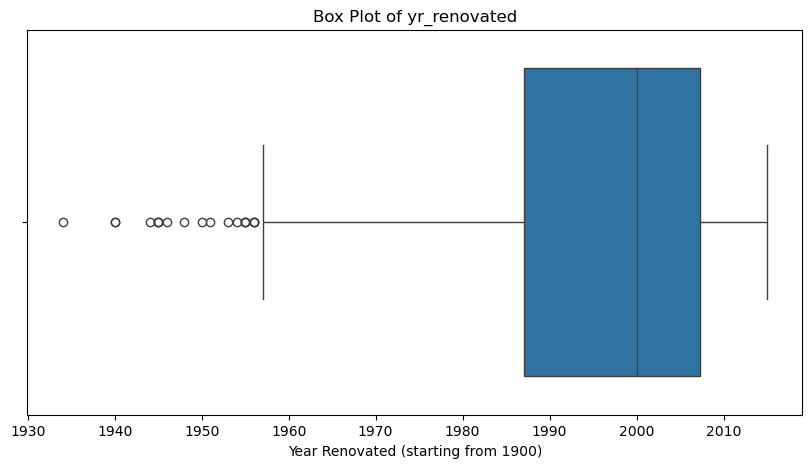

In [14]:

# Set the start year for 'yr_renovated' to 1900
df['yr_renovated'] = df['yr_renovated'] - (df['yr_built'].min() - 1900)

# Exclude houses with 0 values for 'yr_renovated'
df_filtered = df[df['yr_renovated'] > 0]

# Create a box plot for 'yr_renovated'
plt.figure(figsize=(10, 5))
sns.boxplot(x='yr_renovated', data=df_filtered, orient='h')
plt.title('Box Plot of yr_renovated')
plt.xlabel('Year Renovated (starting from 1900)')
plt.show()


## EXPLORATORY DATA ANALYSIS

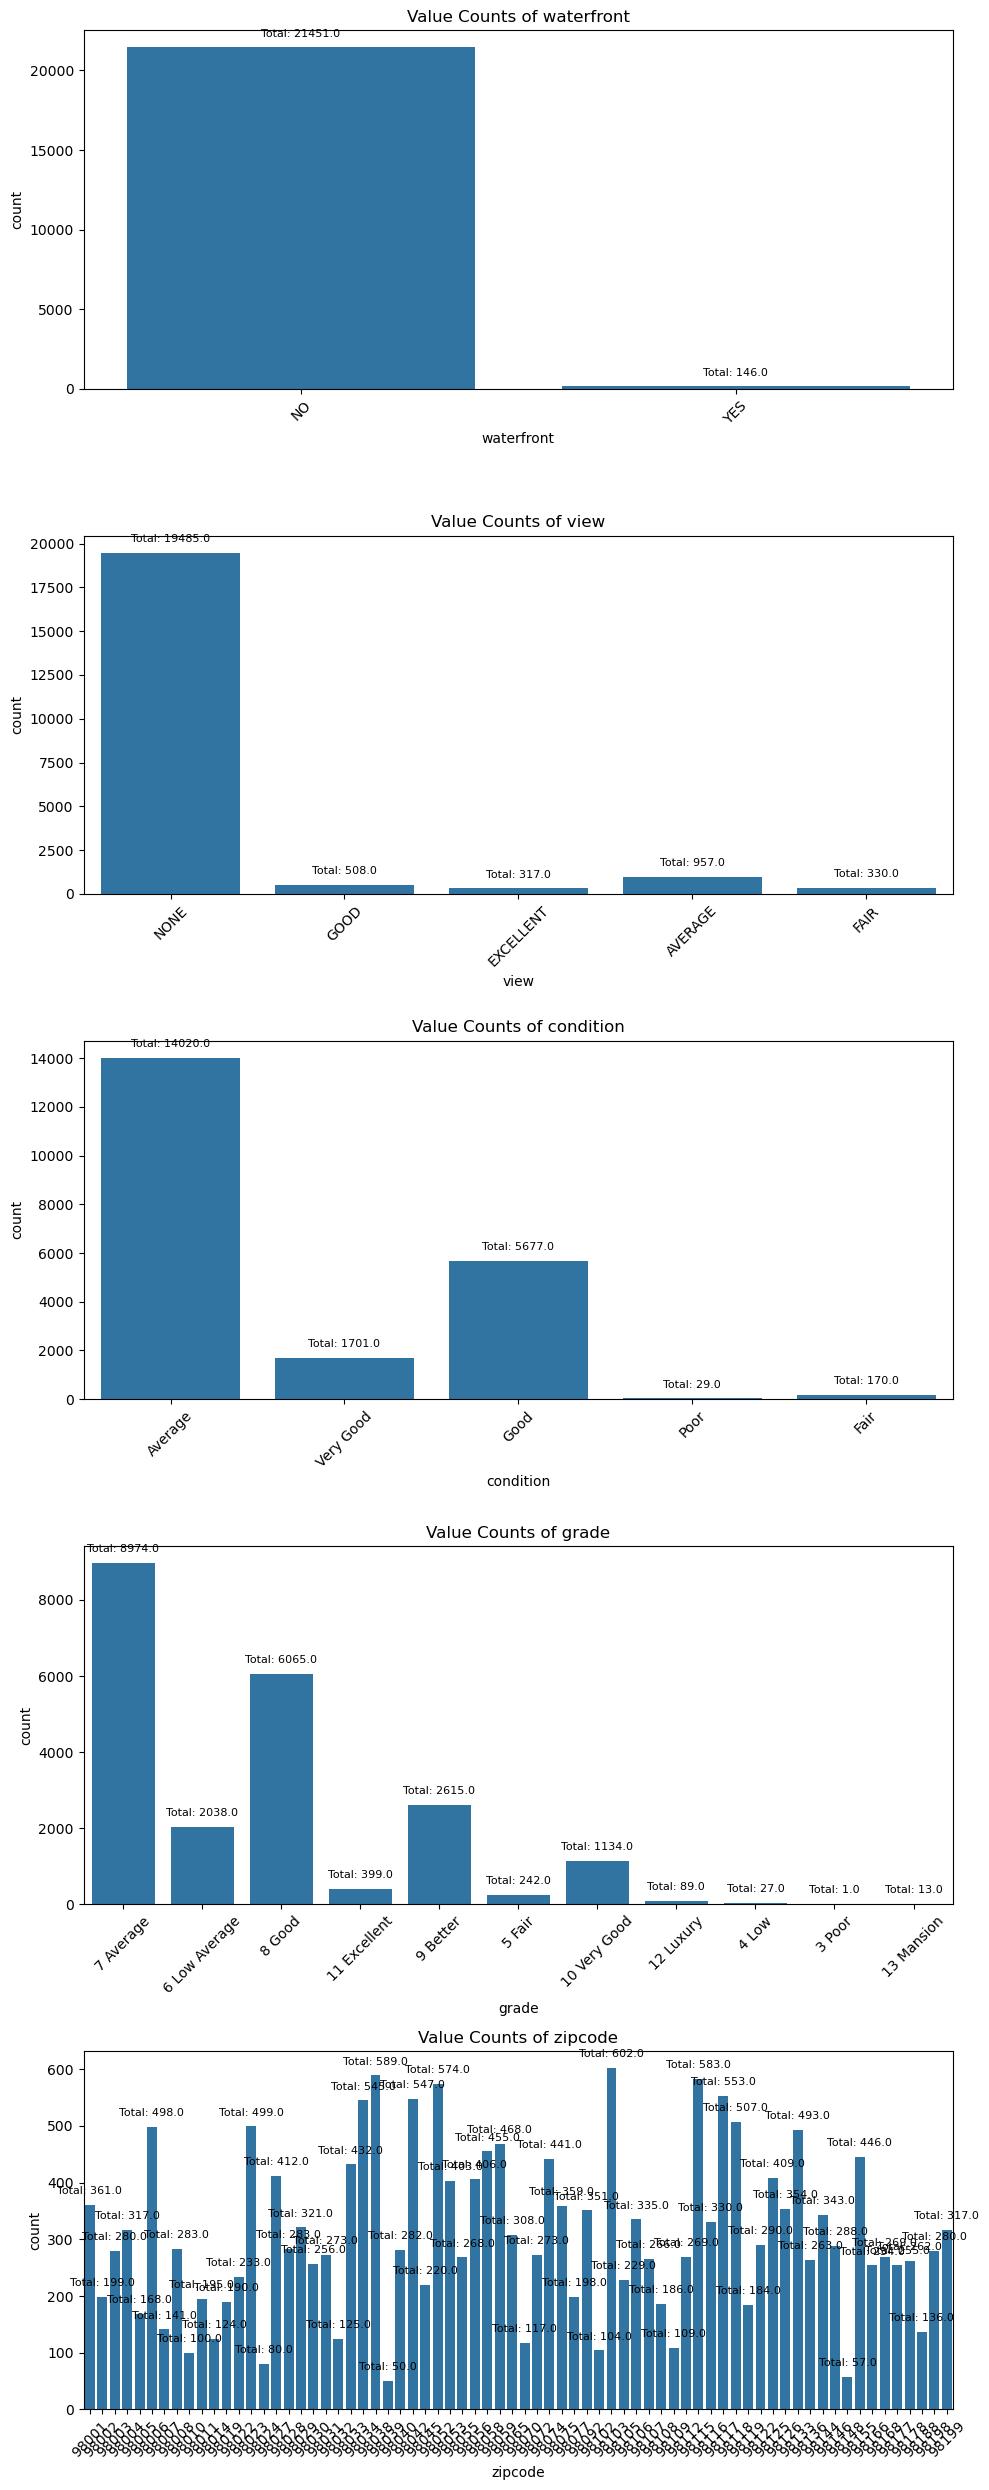

In [15]:
# Specify the categorical columns
categorical_columns = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
# Set up a grid of subplots
num_cols = len(categorical_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))
# Loop through the categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=df[column], ax=axes[i])
    ax.set_title(f'Value Counts of {column}')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)
    
    # Add labels displaying the total value counts for each bar
    for p in ax.patches:
        ax.annotate(f'Total: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Adjust subplot layout
plt.tight_layout()
# Show the plots
plt.show()


### Numerical columns

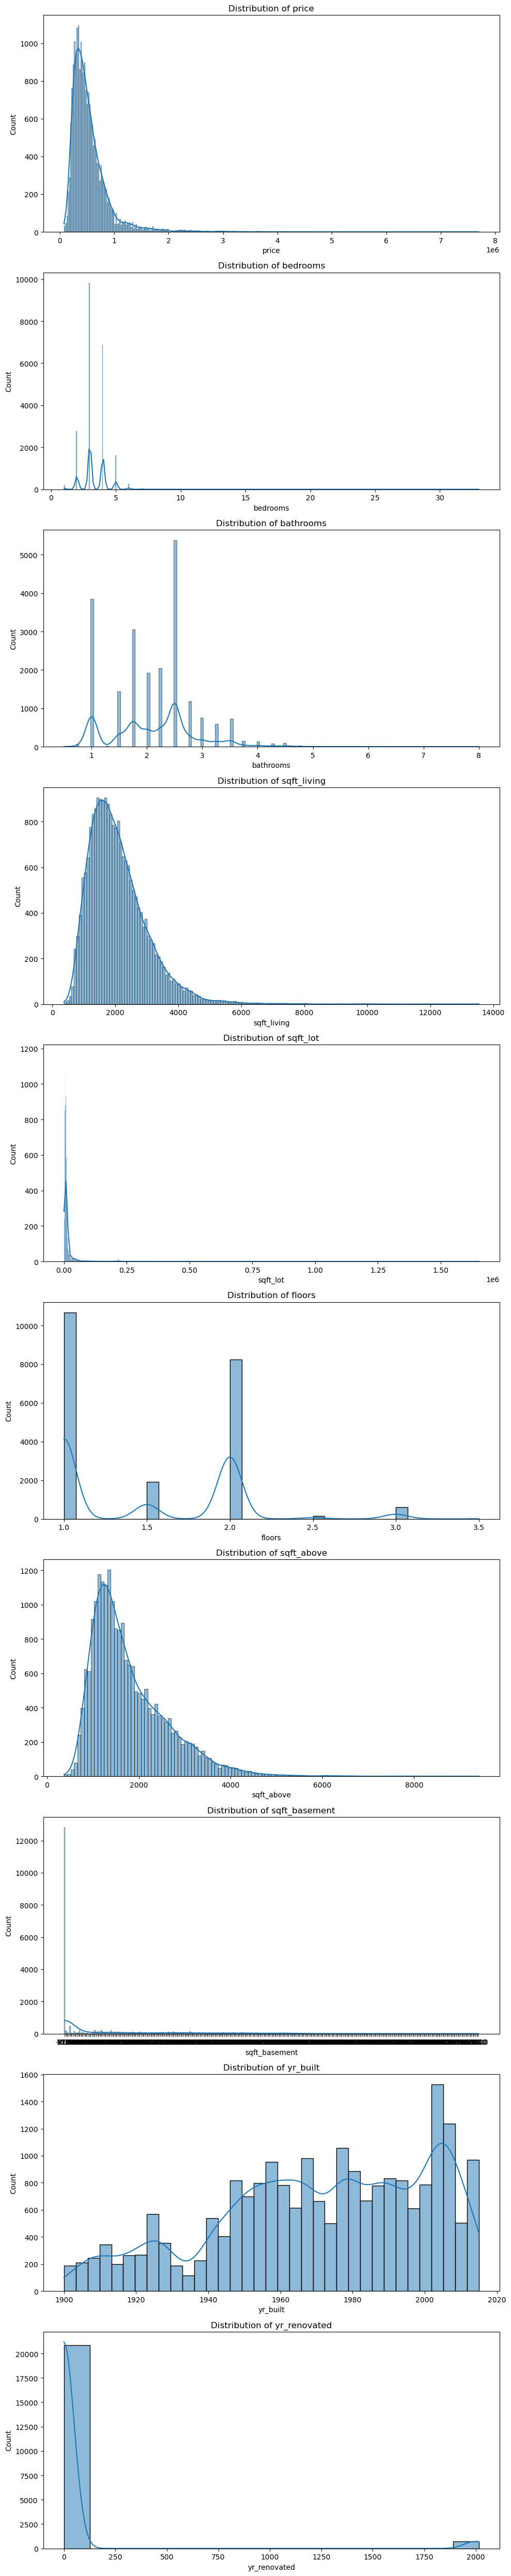

In [16]:
# Specify the columns excluding 'date'
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Set up a grid of subplots
num_cols = len(columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through the specified columns
for i, column in enumerate(columns):
    # Plot: Distribution plot
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()



## Data Preparation and Feature Engineering

In this section, we will cover the essential steps and techniques for preparing the dataset and engineering features. This includes:

1. Data cleaning and handling missing values. 

2. Exploratory data analysis (EDA) to understand the dataset.

3. Feature selection and creation to enhance model performance.

4. Data transformation for better model compatibility.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In the current dataset, we have identified several columns that can be dropped without the need for further feature engineering. These columns include: lat, long, sqft_living15, id and sqft_lot15.

In [18]:
# Assuming 'df' is your original DataFrame
# Create a new copy of the data while dropping the specified columns
new_df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'], axis=1).copy()


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.6+ MB


### Adding a Column to Store House Ages

To enhance our dataset and better understand the properties, we will add a new column to store the age of the houses. This age value will help us in various analyses and modeling tasks, particularly when assessing the impact of a property's age on its price and other characteristics.

In [20]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df['age'] = new_df['date'].dt.year - new_df['yr_built']
# new_df.age

### Removing null values in the 'yr_built" column and adding the 'renovated' column
To enhance our dataset, we will perform the following operations:

1. Remove Null Values in the 'yr_built' Column:
We will eliminate any missing data in the 'yr_built' column to ensure the dataset's integrity.

2. Adding the 'Renovated' Column:
We will create a new column, 'renovated,' which will indicate whether a house has been renovated or not. This addition will provide valuable information for our analysis.
By performing these data cleaning and feature engineering steps, we aim to improve the quality and utility of our dataset for further analysis and modeling.

In [21]:
new_df.loc[new_df.yr_renovated.isnull(), 'yr_renovated'] = 0
new_df['renovated'] = new_df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
# new_df.renovated

#### Convert 'has_basement' to a Binary Value

The 'has_basement' column in the dataset needs to be transformed into a binary value, where '1' represents the presence of a basement, and '0' represents the absence of a basement. This conversion will simplify the representation of basement information, making it more usable for data analysis and modeling.


In [22]:
new_df['sqft_basement'] =new_df['sqft_basement'].replace('?', '0').astype('float')
new_df['has_basement'] =new_df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)


In [23]:
# Check the dataframe information so far
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

#### Ordinal Encoding

Ordinal encoding is a data transformation technique used to convert categorical variables with an inherent order or ranking into numerical values while preserving their ordinal relationships.


#### Create a Function to Map Ordinal Values to Numerical Values

**Objective:** Develop a Python function that takes ordinal values and maps them to numerical values based on a provided dictionary.

**Description:**
- We aim to create a custom Python function that simplifies the process of mapping ordinal values to their corresponding numerical representations.
- The function will take as input a list of ordinal values and a dictionary that defines the mapping.
- This dictionary will associate ordinal values with numerical values.
- The function will produce a DataFrame with the original ordinal values and their mapped numerical equivalents.
- This mapping capability will be valuable in various applications, such as data preprocessing for machine learning models.

In [24]:
def map_ordinal_values(df, col_name, value_dict):
    # map the ordinal values to numerical values using the provided dictionary
    df[col_name] = df[col_name].map(value_dict).astype(int)
    return df

In [25]:
# Count the occurrences of each unique value in the 'view' column and display the results.
df.view.value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [26]:
# Mapping categorical values to ordinal values for 'condition,' 'grade,' and 'view' columns.
# This allows us to represent qualitative data with meaningful numerical values for analysis.
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}
view_dict = {'NONE':0, 'AVERAGE':1, 'GOOD': 2, 'FAIR':3, 'EXCELLENT':4}
# The resulting DataFrame 'new_df' contains mapped ordinal values.
new_df = map_ordinal_values(new_df, 'condition', condition_dict)
new_df = map_ordinal_values(new_df, 'grade', grade_dict)
new_df = map_ordinal_values(new_df, 'view', view_dict)

print(new_df[['condition', 'grade', 'view']])

       condition  grade  view
0              3      7     0
1              3      7     0
2              3      6     0
3              5      7     0
4              3      8     0
...          ...    ...   ...
21592          3      8     0
21593          3      8     0
21594          3      7     0
21595          3      8     0
21596          3      7     0

[21597 rows x 3 columns]


#### One Hot Encoding
To enhance our data analysis, we'll perform one-hot encoding on the "waterfront" and "view" columns. One-hot encoding is a technique used to convert categorical variables into binary (0 or 1) format, making them suitable for machine learning models.

Note: To avoid the "Dummy Variable Trap," we'll create one-hot encoded columns while dropping one of them. The Dummy Variable Trap occurs when two or more one-hot encoded columns are highly correlated, leading to multicollinearity in regression models. By removing one of the encoded columns, we mitigate this issue and ensure the model's stability.

In [27]:
# Calculate the number of unique values in the 'waterfront' column of the new DataFrame (new_df).
new_df.waterfront.nunique()

2

## One-Hot Encoding Function

**Purpose:** This function enables one-hot encoding for a specified column in a dataset, converting categorical variables into a binary format.

In [28]:
def one_hot_encode(df, columns):
    if isinstance(columns, str):
        # Convert to a list if it's a string
        columns = [columns]  

    df = pd.get_dummies(df, columns=columns, prefix_sep='_', drop_first=True)
    return df

In [29]:
# Using the one_hot_encoding function to convert the data in 'waterfront into binary format
new_df = one_hot_encode(new_df, columns=['waterfront'])

In [30]:
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age,renovated,has_basement,waterfront_YES
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,0.0,98178,59,0,0,False
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,1991.0,98125,63,1,1,False
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,0.0,98028,82,0,0,False
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0,1965,0.0,98136,49,0,1,False
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0,1987,0.0,98074,28,0,0,False


To process the 'new_df' DataFrame, we select all columns with boolean data types and convert them into integers.

In [31]:
# Select columns with dtype 'bool' and convert them to int
bool_columns = new_df.select_dtypes(include=['bool'])
new_df[bool_columns.columns] = bool_columns.astype(int)


In [32]:
# Checking out the new_df with all changes done
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age,renovated,has_basement,waterfront_YES
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,0.0,98178,59,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,1991.0,98125,63,1,1,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,0.0,98028,82,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0,1965,0.0,98136,49,0,1,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0,1987,0.0,98074,28,0,0,0


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21597 non-null  datetime64[ns]
 1   price           21597 non-null  float64       
 2   bedrooms        21597 non-null  int64         
 3   bathrooms       21597 non-null  float64       
 4   sqft_living     21597 non-null  int64         
 5   sqft_lot        21597 non-null  int64         
 6   floors          21597 non-null  float64       
 7   view            21597 non-null  int32         
 8   condition       21597 non-null  int32         
 9   grade           21597 non-null  int32         
 10  sqft_above      21597 non-null  int64         
 11  sqft_basement   21597 non-null  float64       
 12  yr_built        21597 non-null  int64         
 13  yr_renovated    21597 non-null  float64       
 14  zipcode         21597 non-null  int64         
 15  ag

In [34]:
new_df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age,renovated,has_basement,waterfront_YES
count,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000
mean,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.195907,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,43.323286,0.034449,0.38510,0.006760
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,-1.000000,0.000000,0.00000,0.000000
25%,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,18.000000,0.000000,0.00000,0.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,40.000000,0.000000,0.00000,0.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,63.000000,0.000000,1.00000,0.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,115.000000,1.000000,1.00000,1.000000
std,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.687319,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,29.377285,0.182384,0.48663,0.081944


### Handling Outliers 
Based on the description, there are outliers in the 'bedrooms' and 'bathrooms' columns. We shall identify them dna remove the entries with these outliers.

In [49]:
# Creating a function that removes potential outliers from specified columns in the dataframe
def remove_outliers(df, column_names, num_std = 3):
    """ parameters:
        - df: the dataframe with the data
        - column_name: a list of columns to remove outliers 
        - num_std: the number of standard deviation from the mean to consider an outlier. default is 3 
    """
    # count variable to keep track of the number of outliers
    outlier_counts = 0 
    
    for column_name in column_names:
        count = 0
        mean = np.mean(df[column_name])
        std = np.std(df[column_name])
        
        # Calculate the lower and upper bounds for potential outliers
        lower_bound = mean - num_std * std
        upper_bound = mean + num_std * std
    
        # Count the outliers for the current column
        count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
        # Filter the DataFrame to keep only values within the bounds
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        
        # Update the outlier count 
        outlier_counts += count
        
    # Return a dataframe with potential outliers removed and the count of outliers
    return df, outlier_counts

In [48]:
# Creating the list of column to check out for outliers
columns_to_check = ['bedrooms', 'bathrooms']
# Using the remove_outliers function
new_df, total_outliers = remove_outliers(df=df, column_names=columns_to_check, num_std=3)
print(f"Removed {total_outliers} outliers in the columns.")

Removed 234 outliers in the column.


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21363 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21363 non-null  int64  
 1   date           21363 non-null  object 
 2   price          21363 non-null  float64
 3   bedrooms       21363 non-null  int64  
 4   bathrooms      21363 non-null  float64
 5   sqft_living    21363 non-null  int64  
 6   sqft_lot       21363 non-null  int64  
 7   floors         21363 non-null  float64
 8   waterfront     21363 non-null  object 
 9   view           21363 non-null  object 
 10  condition      21363 non-null  object 
 11  grade          21363 non-null  object 
 12  sqft_above     21363 non-null  int64  
 13  sqft_basement  21363 non-null  object 
 14  yr_built       21363 non-null  int64  
 15  yr_renovated   21363 non-null  float64
 16  zipcode        21363 non-null  int64  
 17  lat            21363 non-null  float64
 18  long       

### Bivariate Analysis: Exploring Relationships between Two Variables

#### Scatter plot 
*Purpose:* to show the relationship between price and the other features

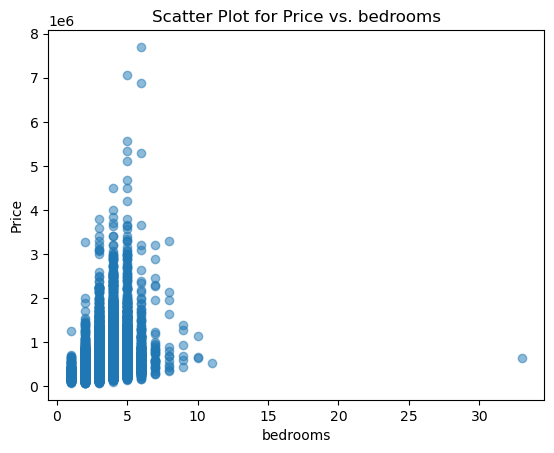

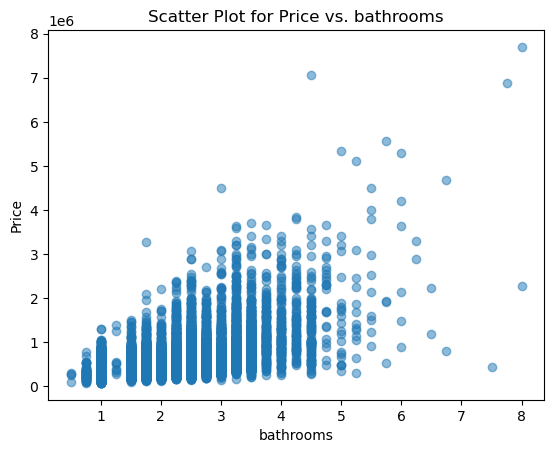

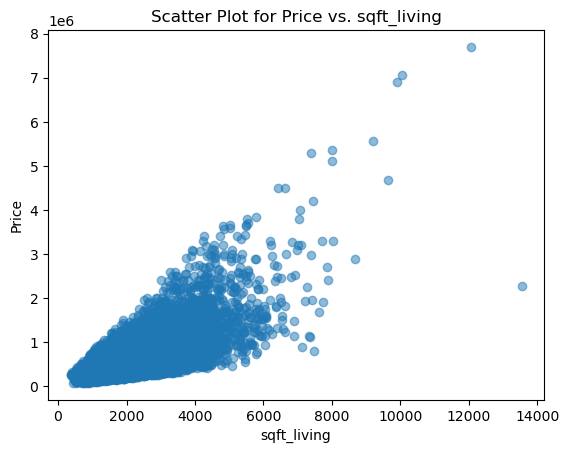

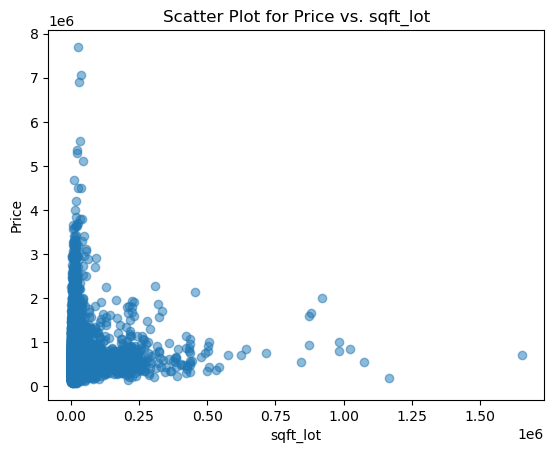

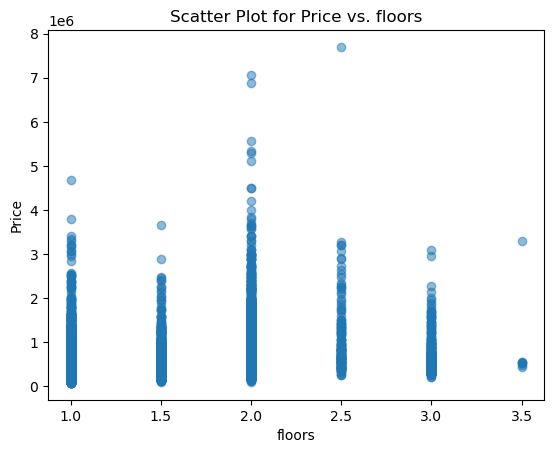

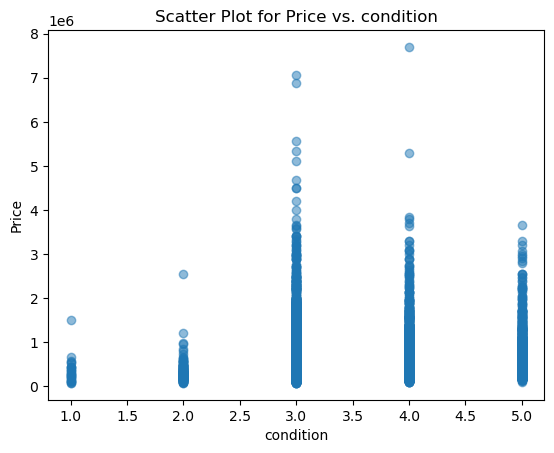

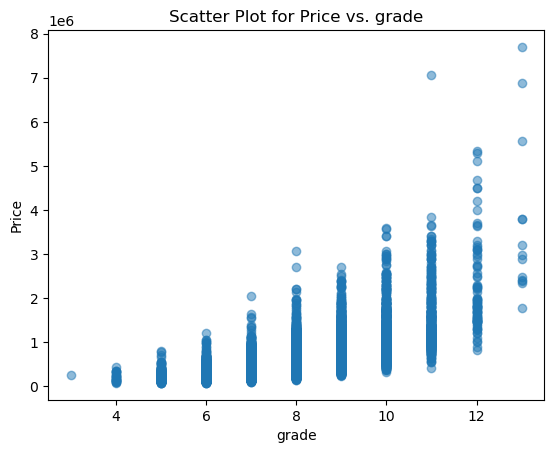

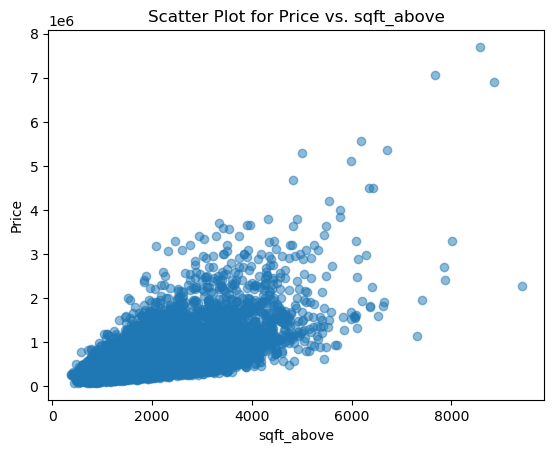

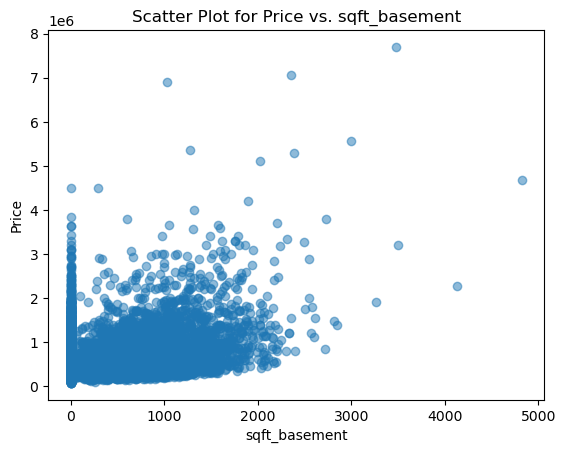

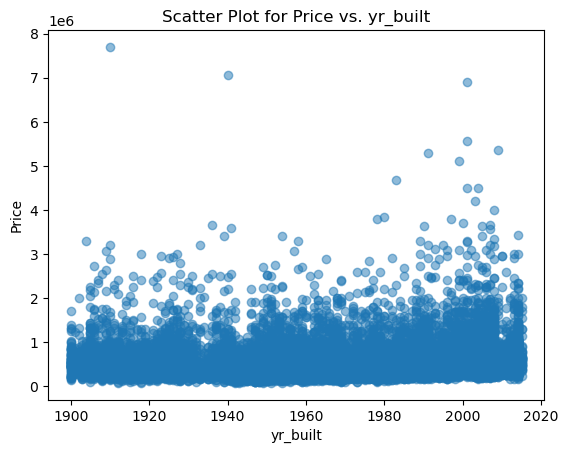

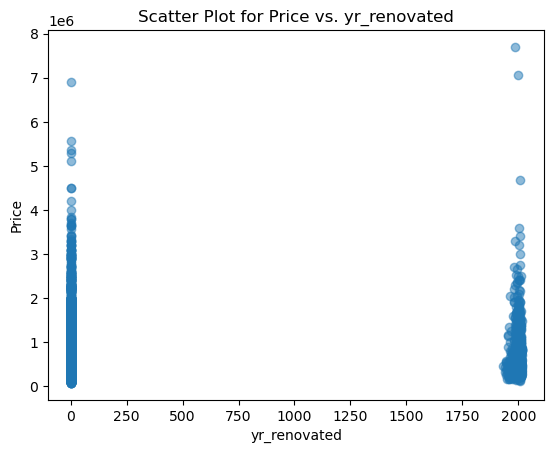

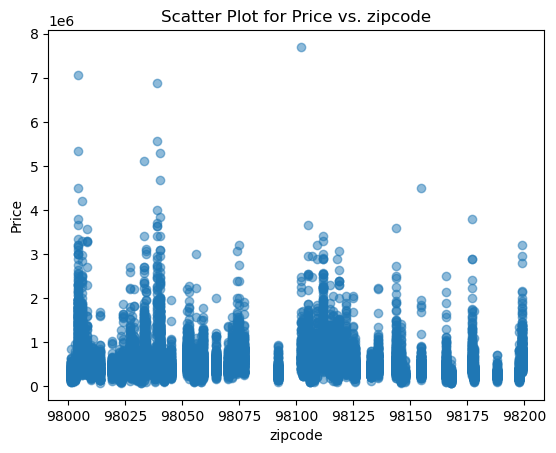

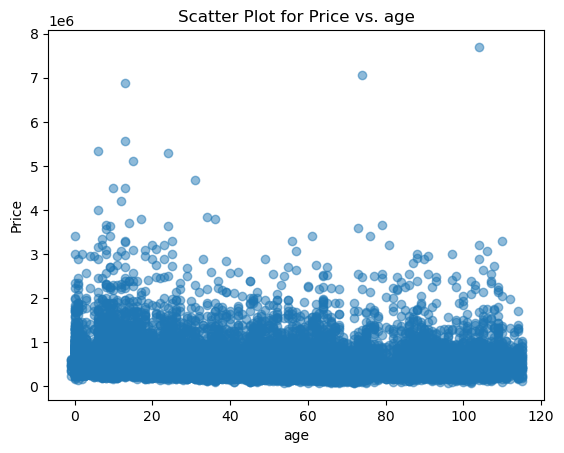

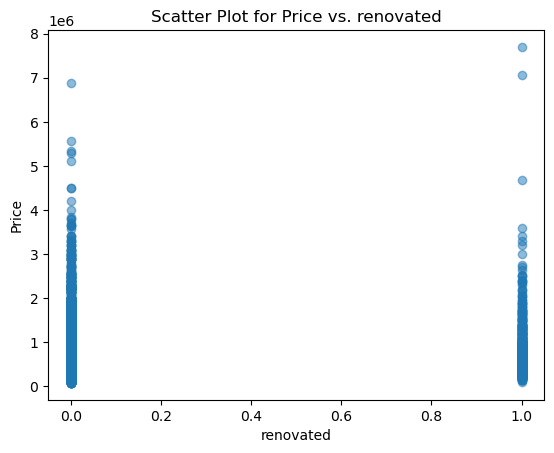

In [ ]:
# Create a separate scatter plot for each of the specified columns

columns_to_plot = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
    'yr_renovated', 'zipcode', 'age', 'renovated'
]

for column in columns_to_plot:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(new_df[column], new_df['price'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot for Price vs. {column}')

plt.show()


In [ ]:
new_df.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age,renovated,has_basement,waterfront_YES
date,1.000000,-0.003998,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,-0.000626,-0.050883,-0.039773,-0.027638,-0.017588,-0.000279,-0.022853,0.001605,0.013865,-0.022823,-0.004925,0.000363
price,-0.003998,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.386430,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,-0.053890,0.117543,0.178264,0.264306
bedrooms,-0.016523,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.070475,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.155817,0.017635,0.158412,-0.002127
bathrooms,-0.034236,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.169760,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,-0.507561,0.046742,0.159863,0.063629
sqft_living,-0.034276,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.262220,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,-0.318592,0.050829,0.201198,0.104637
sqft_lot,0.006337,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052990,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.052853,0.005091,-0.034889,0.021459
floors,-0.022333,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.016413,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,-0.489514,0.003713,-0.252465,0.020797
view,-0.000626,0.386430,0.070475,0.169760,0.262220,0.052990,0.016413,1.000000,0.046191,0.227019,0.149484,0.262963,-0.055078,0.092280,0.085281,0.055099,0.092437,0.175634,0.412224
condition,-0.050883,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.046191,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,0.360836,-0.055383,0.130542,0.016648
grade,-0.039773,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.227019,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,-0.185771,-0.448322,0.015259,0.050701,0.082818


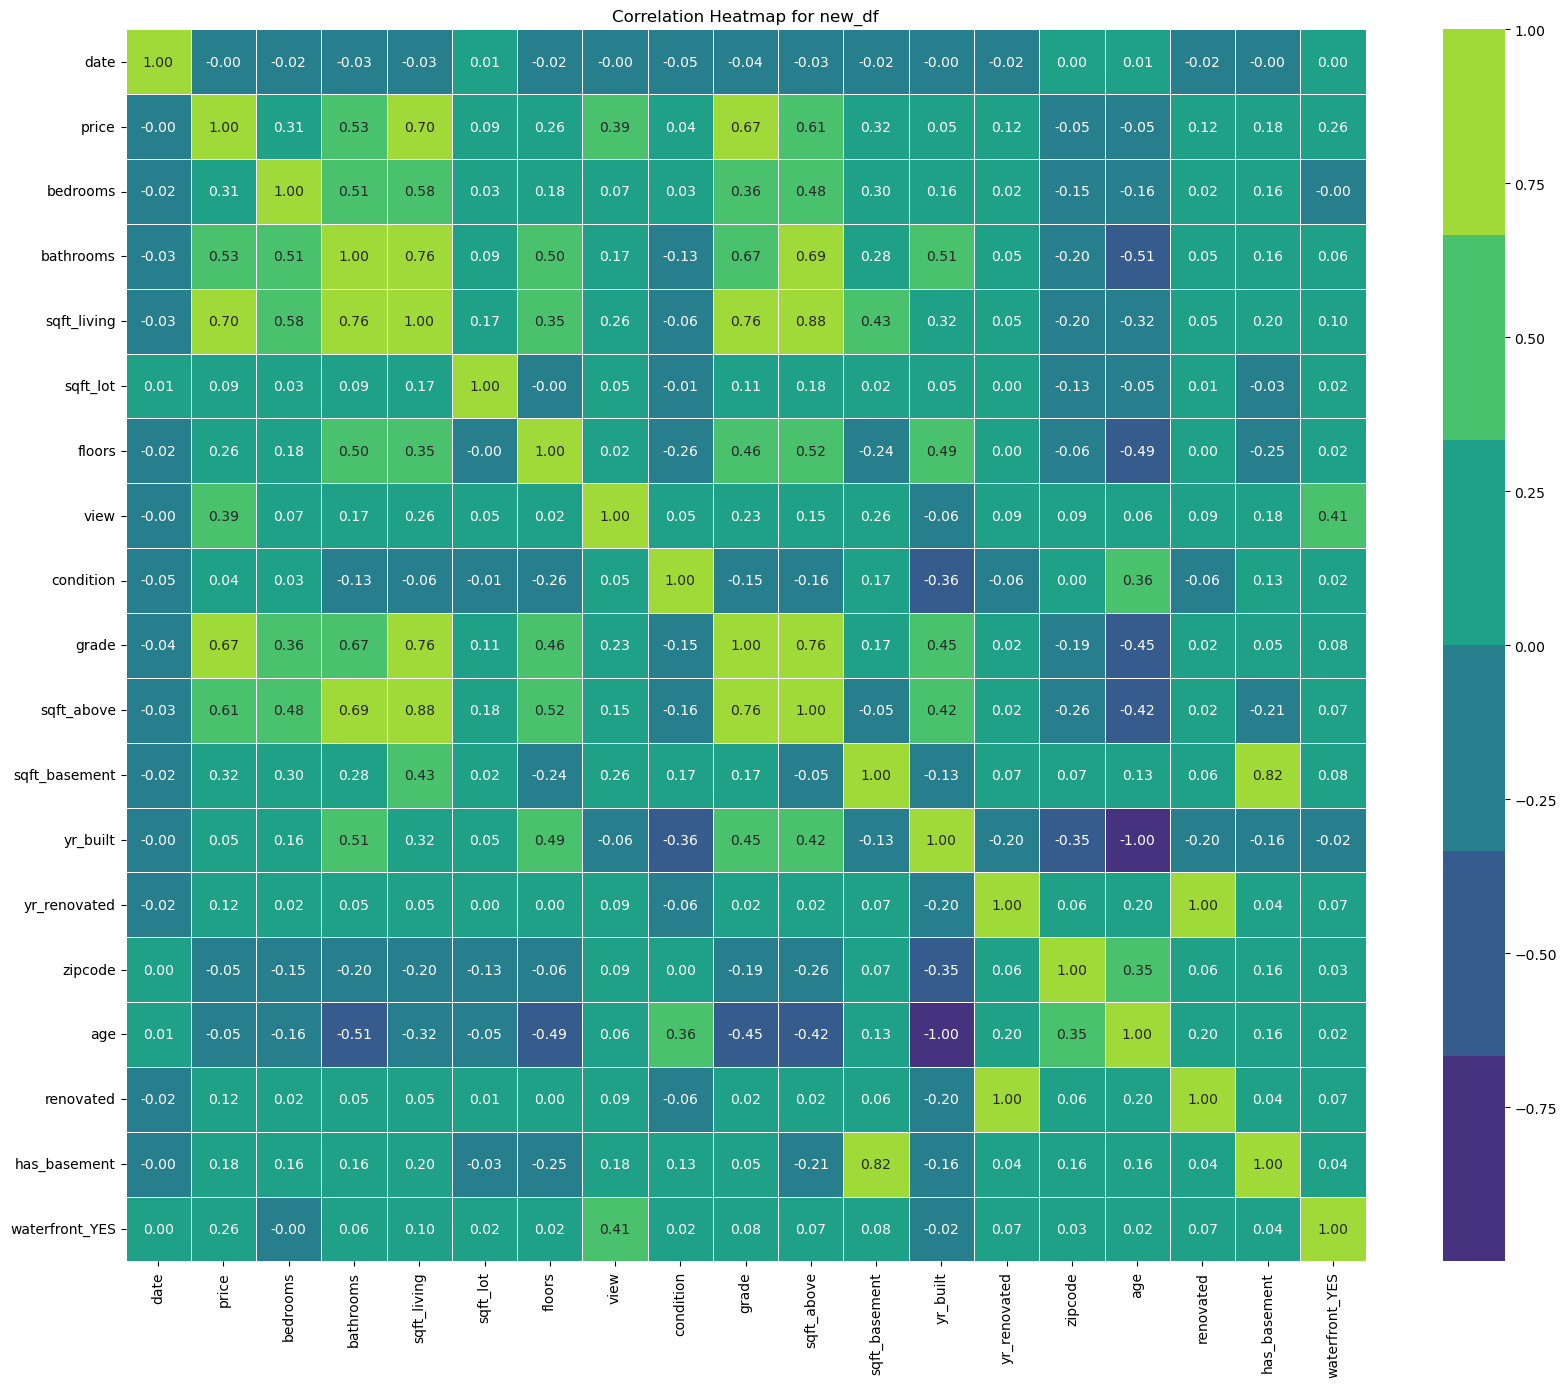

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set a color palette
cmap = sns.color_palette("viridis")

# Create the heatmap
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for new_df')

plt.show()


In [ ]:
# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
price_corr = new_df.corr()['price'].sort_values(ascending=False)
print(price_corr)


price             1.000000
sqft_living       0.701917
grade             0.667951
sqft_above        0.605368
bathrooms         0.525906
view              0.386430
sqft_basement     0.321108
bedrooms          0.308787
waterfront_YES    0.264306
floors            0.256804
has_basement      0.178264
yr_renovated      0.117855
renovated         0.117543
sqft_lot          0.089876
yr_built          0.053953
condition         0.036056
date             -0.003998
zipcode          -0.053402
age              -0.053890
Name: price, dtype: float64


C:\Users\Leonardo Da_Vinci\AppData\Local\Temp\ipykernel_12544\4277890179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.values, y=price_corr.index, palette='viridis')


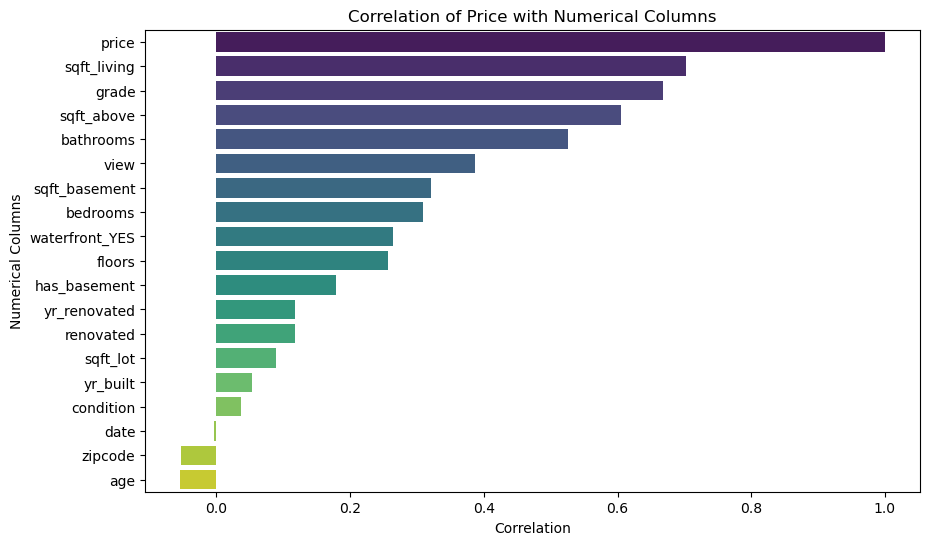

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
price_corr = new_df.corr()['price'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=price_corr.values, y=price_corr.index, palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Numerical Columns')
plt.title('Correlation of Price with Numerical Columns')
plt.show()


### REGRESSION MODELLING
#### Creating the base model

#### From the figure above, it is clear that sqft_living has the highest correlation to the price of the house:

In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variable for the intercept
X = sm.add_constant(new_df['sqft_living'])

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(new_df['price'], X).fit()

# Get model summary
summary = model.summary()

# Extract R-squared and F-statistic from the summary
r_squared = model.rsquared
f_statistic = model.fvalue

print(summary)
# print(f"R-squared: {r_squared}")
# print(f"F-statistic: {f_statistic}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### At the moment the model can predict about 49.3% of the price of the houses.